![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
# SUGERIDO: Descomenta la siguiente linea de código si requieres instalar las libreías básicas utilizadas en este notebook
# Si requieres incluir más librerías puedes agregarlas al archivo Semana 4\requirements.txt
#!pip install -r requirements.txt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as n

import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

<Axes: >

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

**Vectorizador de texto**

**Proceso**:  
1.   Se usa el CountVectorizer para transformar los comentarios a una matriz númerica basada en el conteo de palabras.
2.  Se realiza fit_transform sobre el set de entrenamiento para ajustar y transformar, y transform sobre el set de prueba (de acuerdo a lo indicado)

In [ ]:
vect_comments = CountVectorizer()

In [ ]:
# Datos de entrenamiento (ajuste y transformación)
X_train_vect = vect_comments.fit_transform(X_train)

# Datos de prueba (solo transformación)
X_test_vect = vect_comments.transform(X_test)

**Entrenamiento del modelo**

**Proceso**:  
Se define un modelo de regresión Ridge para predecir la probabilidad de que un comentario sea tóxico.  



In [ ]:
# Modelo Ridge
modelo = Ridge(solver='sag')

# Datos de entrenamiento
modelo.fit(X_train_vect, y_train)

Ridge(solver='sag')

**Evaluación del modelo**

**Proceso**:  
1. Se usa el conjunto de prueba X_test_vect de acuerdo a el modelo entrenado.  
2. Se calcula el (MSE) para evaluar el desempeño del modelo.

In [ ]:
# Datos de prueba
y_pred = modelo.predict(X_test_vect)

# Cálculo del MSE
mse = mean_squared_error(y_test, y_pred)

# Resultado
print(f"MSE: {mse:.4f}")

MSE: 0.0261


**Conclusión**

Se obtuvo un resultado del MSE del 0.0261 lo que indica que el modelo tienen un buen desempelo y logra capturar las características del texto sobre el conjunto de prueba.

# Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

**CountVectorizer y trigramas**

**Proceso**:  
1. Se utiliza CountVectorizer con unigramas, bigramas y trigramas.  
2. Se mantiene el parámetro por defecto lowercase=True
3. Se realiza fit_transform sobre el set de entrenamiento para ajustar y transformar, y transform sobre el set de prueba (de acuerdo a lo indicado)
4. Se entrena con el mismo modelo de Ridge utilizado en el punto 1.

In [ ]:
# Con trigramas
vect_comments_trigram = CountVectorizer(ngram_range=(1,3))
#vect_comments_trigram = CountVectorizer(ngram_range=(1,3), max_features=50000)

In [ ]:
# Datos de entrenamiento (ajuste y transformación)
X_train_vect_trigram = vect_comments_trigram.fit_transform(X_train)

# Datos de prueba (solo transformación)
X_test_vect_trigram = vect_comments_trigram.transform(X_test)

**Entrenamiento del modelo**

**Proceso**:  
1. Se utiliza nuevamente el modelo de Ridge.
2. Se entrena el modelo utilizando los datos de entrenamiento procesados con trigramas.

In [ ]:
# Traer el modelo definido
modelo = Ridge(solver='sag')


# Datos de entrenamiento con trigramas
modelo.fit(X_train_vect_trigram, y_train)


Ridge(solver='sag')

**Evaluación del modelo**

**Proceso:**

1. Se usa el conjunto de prueba X_test_vect_trigram de acuerdo a el modelo entrenado.
2. Se calcula el (MSE) para evaluar el desempeño del modelo.

In [ ]:
# Datos de prueba
y_pred_trigram = modelo.predict(X_test_vect_trigram)

# Cálculo del MSE
mse_trigram = mean_squared_error(y_test, y_pred_trigram)

# Resultado
print(f"MSE Trigramas: {mse_trigram:.4f}")

MSE Trigramas: 0.0333


**Conclusion:**
Se obtuvo un resultado del MSE del 0.0333 lo que indica que el modelo tienen una pequeña mejora frente al punto anterior. Aunque el modelo logra capturar características adicionales del texto al incluir trigramas, no necesariamente mejora el desempeño predictivo sobre el conjunto de prueba.

# Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

Referencia: https://www.geeksforgeeks.org/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/

### ¿Qué es TfidfVectorizer?
TfidfVectorizer es una técnica de extracción de características de la biblioteca scikit-learn que convierte una colección de documentos de texto sin procesar en una matriz de características TF-IDF (Frecuencia de Término-Frecuencia Inversa de Documento). Este es un paso común en el Procesamiento del Lenguaje Natural (PLN) y en las tareas de minería de texto para transformar datos de texto en datos numéricos con los que los algoritmos de aprendizaje automático pueden trabajar.

### Cómo funciona TfidfVectorizer?

Se descompone por partes



### **1. Frecuencia de Término (TF):**
Mide la frecuencia con la que aparece un término (palabra) en un documento. Se asume que cuanto más frecuentemente aparece un término en un documento, más importante es. Sin embargo, esto por sí solo puede ser engañoso, ya que palabras comunes (como "el", "es", "y") aparecerán con frecuencia en muchos documentos.
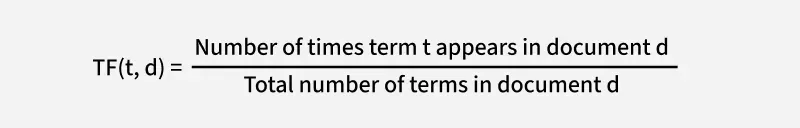


In [ ]:
# Data de prueba - Docs
docs = [
    "el gato come el pescado",
    "el perro corre y el gato duerme"
]

In [ ]:
# Solo TF, sin IDF ni normalización
tf_only = TfidfVectorizer(use_idf=False, norm=None)
X_tf = tf_only.fit_transform(docs)

df_tf = pd.DataFrame(
    X_tf.toarray().astype(int),
    columns=tf_only.get_feature_names_out(),
    index=["Doc A", "Doc B"]
)

print("Frecuencia de término (TF) pura")
df_tf.head()


Frecuencia de término (TF) pura


,come,corre,duerme,el,gato,perro,pescado
Doc A,1,0,0,2,1,0,1
Doc B,0,1,1,2,1,1,0


Sin aplicar todavía la parte “IDF”.

*Lectura rápida*

* En **Doc A** la palabra **«el»** aparece 2 veces; otras palabras solo 1.  
* En **Doc B** «el» domina con 3 apariciones.  
* Si usáramos estos conteos directamente, **«el»** se vería como la palabra “más importante” en ambos documentos, a pesar de ser un término muy común que no aporta significado.

Esto ilustra por qué, en la práctica, la fase de TF suele complementarse con **IDF** (o con la eliminación de *stop-words*) para atenuar el peso de las palabras extremadamente frecuentes.

*Limitaciones:*
- TF no tiene en cuenta la importancia global de un término en todo el corpus.
- Palabras comunes como "el" o "y" pueden tener puntuaciones altas de TF, pero no son significativas para distinguir documentos.



### **2. Frecuencia Inversa de Documento (IDF):**
Mide la importancia de un término considerando su frecuencia de aparición en todos los documentos del conjunto de datos. Cuantos más documentos aparecen, menos importante es. El valor IDF de un término disminuye a medida que aumenta el número de documentos que lo contienen.

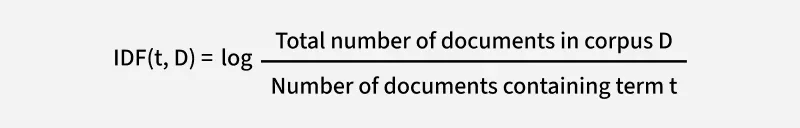

In [ ]:
# dejamos la IDF "pura", sin normalizar TF
tfidf_full = TfidfVectorizer(norm=None, smooth_idf=True)
tfidf_full.fit(docs)

idf_vals = pd.DataFrame(
    {
        "término": tfidf_full.get_feature_names_out(),
        "IDF": tfidf_full.idf_.round(3)
    }
).sort_values("IDF", ascending=False)

print("IDF por término")
idf_vals.head(10)

IDF por término


,término,IDF
0,come,1.405
1,corre,1.405
2,duerme,1.405
5,perro,1.405
6,pescado,1.405
3,el,1.000
4,gato,1.000


*la tabla anterior sugiere*

* **«el»** aparece en **ambos** documentos => recibe el **IDF más bajo** (≈ 1.0).  
* Las demás palabras se encuentran solo en **uno** de los documentos → IDF ≈ 1.405, más alto.

**Entonces**  
 - El IDF “premia” términos que son **raros a nivel de corpus** (p. ej. «pescado»), porque aportan más información para diferenciar documentos.  
 - Y “penaliza” los que aparecen en prácticamente **todas** las frases (p. ej. «el»), porque aportan muy poca.

*Limitaciones del IDF por sí solo:*

- El IDF no considera cuán frecuentemente aparece un término dentro de un documento específico.
- Un término podría ser raro en todo el corpus (IDF alto) pero irrelevante en un documento específico (TF bajo).


###  **3. TF-IDF:**
El producto de TF e IDF. Esta puntuación indica la importancia de un término dentro de un documento específico, a la vez que reduce el peso de los términos comunes que son menos informativos.


1. Primero se observa los **conteos brutos** (TF). Ahí **«el»** dominaba.  
2. Ahora IDF indica que «el» merece *poco peso global*.  
3. Cuando se combina ambos (TF × IDF), «el» seguirá influyendo (aparece 2 o 3 veces), pero su peso total quedará **atenuado** frente a términos exclusivos como «pescado», «perro» o «corre».

De esta forma TF-IDF equilibra la importancia local de un término dentro de su documento (TF) con su rareza global en el corpus (IDF).


In [ ]:
# L2 normalization por defecto
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(docs)

df_tf_idf = pd.DataFrame(
    X.toarray().round(3),
    columns=tfidf.get_feature_names_out(),
    index=["Doc 0", "Doc 1"]
)

df_tf_idf.head()

,come,corre,duerme,el,gato,perro,pescado
Doc 0,0.47,0.000,0.000,0.669,0.334,0.000,0.47
Doc 1,0.00,0.425,0.425,0.605,0.303,0.425,0.00


la tabla anterior revela:

* Cada fila está **normalizada** (norma L2 = 1).  
* **«el»** sigue siendo el término más repetido en ambos documentos, pero su peso (≈ 0.66 y 0.61) queda acotado, evitando que domine completamente el vector.  
* Palabras exclusivas de cada documento («pescado», «corre», «duerme», «perro») reciben pesos cercanos a 0.42 – 0.47, reflejando su alta capacidad de distinguir entre los dos textos.  
* La combinación TF × IDF + normalización hace que los vectores puedan compararse fácilmente aun si los documentos tuvieran longitudes distintas.


### `TfidfVectorizer` vs `CountVectorizer`

| Dimensión | **CountVectorizer** (conteo puro) | **TfidfVectorizer** (TF × IDF) |
|-----------|-----------------------------------|--------------------------------|
| **Valor que almacena** | Entero con el número de apariciones de cada término en el documento. | Peso real que combina la frecuencia interna (TF) y la rareza global (IDF). |
| **Influencia de palabras muy frecuentes** | Alta → términos como *«el», «y»* pueden dominar el vector. | Baja → el IDF desinfla automáticamente las palabras comunes. |
| **Necesidad de pre-proceso** | Frecuentemente requiere eliminar *stop-words* y normalizar manualmente. | Menos limpieza necesaria: la ponderación reduce el ruido por sí sola. |
| **Efecto del tamaño del documento** | Documentos largos producen vectores con conteos grandes (sesgo). | Normalización (L2 por defecto) equilibra la longitud de los documentos. |
| **Interpretabilidad** | Fácil: un “5” significa 5 apariciones. | Menos directa: un peso 0.47 refleja TF × IDF. |
| **Coste computacional** | Una sola pasada; matriz de enteros (ligera). | Requiere calcular DF → una pasada extra; matriz de flotantes (más memoria). |
| **Rendimiento típico en clasificación** | Bueno, pero el modelo debe aprender a ignorar el ruido de *stop-words*. | Suele mejorar F1/AUC en SVM, regresión logística, redes simples. |
| **Escenarios donde brilla** | *Modelado de lenguaje*, Naïve Bayes multinomial, análisis de repetición. | Clasificación temática, motores de búsqueda, detección de spam/sentimiento. |
| **Escenarios donde falla** | Cuando hay muchas *stop-words* o documentos muy largos/desbalanceados. | Cuando la señal depende del **conteo absoluto** (p.ej. «spam spam spam»). |

---

#### Reglas prácticas para el uso de cada uno

1. **Empieza con `TfidfVectorizer`** para tareas de clasificación, clustering o búsqueda si no conoces bien tu corpus.  
2. **Prefiere `CountVectorizer`** cuando:  
   * Necesites probabilidades basadas en conteo (Naïve Bayes clásico, modelos de lenguaje).  
   * La señal sea la **cantidad absoluta** de un término (detección de exceso de repetición, análisis de estilo).  
   * Busques interpretabilidad directa de “cuántas veces aparece la palabra X”.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
# Uso de TfidVectorizer
tfidf = TfidfVectorizer()

# En Train
X_train_tfidf = tfidf.fit_transform(X_train)

#En Test
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
#Entrenamiento con Ridge y predicción
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_tfidf, y_train)

y_pred = ridge.predict(X_test_tfidf)

In [ ]:
# Evaluar con MSE
mse_tfidf = mean_squared_error(y_test, y_pred)
print(f"MSE TfidfVectorizer: {mse_tfidf:.4f}")

MSE TfidfVectorizer: 0.0181


Muesta un mejor desempeño en comparación con los modelos utilizados con CountVectorizer con unigramas y trigramas. Ya que TfidfVectorizer no solo considera la frecuencia de las palabras, sino también su importancia relativa en los comentarios, haciendo que se capture de manera más efectiva las características relevantes para predecir la toxicidad. Mejora la calidad de las predicciones

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

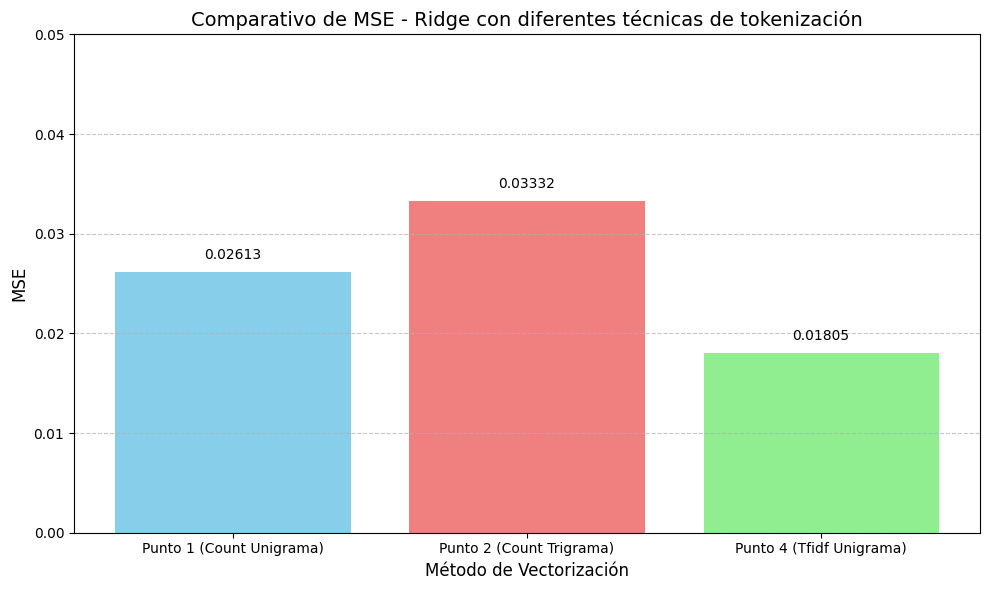

,Técnica de Tokenización,MSE Obtenido
0,CountVectorizer (Unigrama),0.026128
1,CountVectorizer (Trigrama),0.033322
2,TfidfVectorizer (Unigrama),0.018051


In [ ]:
# Celda 5 Código para graficos y tablas comparativas

puntos = [
    'Punto 1 (Count Unigrama)',
    'Punto 2 (Count Trigrama)',
    'Punto 4 (Tfidf Unigrama)'
]
mse_valores = [mse, mse_trigram, mse_tfidf]

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(puntos, mse_valores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparativo de MSE - Ridge con diferentes técnicas de tokenización', fontsize=14)
plt.ylabel('MSE', fontsize=12)
plt.xlabel('Método de Vectorización', fontsize=12)
plt.ylim(0, 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(mse_valores):
    plt.text(i, v + 0.001, f"{v:.5f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Crear tabla resumen de resultados
resultados = {
    "Técnica de Tokenización": [
        "CountVectorizer (Unigrama)",
        "CountVectorizer (Trigrama)",
        "TfidfVectorizer (Unigrama)"
    ],
    "MSE Obtenido": mse_valores
}

df_resultados = pd.DataFrame(resultados)

# Mostrar la tabla de resultados
df_resultados.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

## Punto 5.1 - Comparación y análisis de resultados ##

La tokenización básica con CountVectorizer usando palabras individuales logró un desempeño intermedio con un MSE de (0.0261), muestra que al tratar todas las palabras con igual peso no aprovechó completamente la información del texto.

La tokenización con CountVectorizer y trigramas aumentó la dimensionalidad, generando datos muy dispersos. Esto perjudicó al modelo, resultando en el peor MSE de (0.033).

Mientras que TfidfVectorizer, que pondera las palabras según su relevancia en el corpus, permitió al modelo focalizarse en los términos significativamente más discriminativos. Esto se reflejó en un mejor MSE de (0.01805), siendo entonces el mejor resultado obtenido.

En conclusión, la forma en que se realiza el preprocesamiento del texto tiene un impacto directo en el desempeño del modelo. Representaciones más avanzadas como TF-IDF, que capturan la importancia real de las palabras, permiten mejorar considerablemente la calidad de la predicción.

## Descripción de las Técnicas de Tokenización Aplicadas ##

**CountVectorizer con unigramas** transforma los comentarios en una lista de palabras, contando cuántas veces aparece cada una. No distingue entre palabras relevantes y comunes, dándole a todas el mismo peso.

**CountVectorizer con trigramas** construye vectores basados en secuencias de tres palabras consecutivas. Aunque permite capturar fragmentos de contexto, incrementa la dimensionalidad, haciendo la representación más dispersa y provocando dificultades para que el modelo generalice adecuadamente.

**TfidfVectorizer con unigramas** pondera cada palabra según su importancia relativa en el corpus, reduciendo el peso de palabras comunes y aumentado el de palabras específicas, logrando mejorar la capacidad del modelo para identificar patrones más representativos.